In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [ ]:
import os
base_dir = '/content/drive/MyDrive/Master Thesis/DDD/Prepared_Data/'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory:
['train', 'validation']

Contents of train directory:
['Defective', 'Non defective']

Contents of validation directory:
['Defective', 'Non defective']


In [ ]:
import os

train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

# Directory with training defective/non defective pictures
train_Defective_dir = os.path.join(train_dir,'Defective')
train_Non_defective_dir = os.path.join(train_dir,'Non defective')

# Directory with validation defective/non defective pictures
validation_Defective_dir = os.path.join(validation_dir,'Defective')
validation_Non_defective_dir = os.path.join(validation_dir,'Non defective')

In [ ]:
train_Defective_dir = "/content/drive/MyDrive/Master Thesis/DDD/Prepared_Data/train/Defective"
train_Non_defective_dir = "/content/drive/MyDrive/Master Thesis/DDD/Prepared_Data/train/Non defective"

train_Defective_fnames = os.listdir(train_Defective_dir)
train_Non_defective_fnames = os.listdir(train_Non_defective_dir)

print(train_Defective_fnames[:10])
print(train_Non_defective_fnames[:10])


['IMG_20201114_100159 (3).jpg', 'IMG_20201114_101124 (2).jpg', 'IMG_20201114_100209 (3).jpg', 'IMG_20201114_102819 (2).jpg', 'IMG_20201114_102222 (2).jpg', 'IMG_20201114_101200 (3).jpg', 'IMG_20201114_103110 (2).jpg', 'IMG_20201114_102203 (2).jpg', 'IMG_20201211_121712 (2).jpg', 'IMG_20201211_121713 (2).jpg']
['IMG_20201114_101519.jpg', 'IMG_20201114_101529.jpg', 'IMG_20201114_101512.jpg', 'IMG_20201114_101645.jpg', 'IMG_20201114_101708.jpg', 'IMG_20201114_101643.jpg', 'IMG_20201114_101651.jpg', 'IMG_20201114_101720.jpg', 'IMG_20201114_101814.jpg', 'IMG_20201114_101842.jpg']


In [ ]:
print('total training Defective images :', len(os.listdir(train_Defective_dir ) ))
print('total training Non_defective images :', len(os.listdir(train_Non_defective_dir ) ))

print('total validation Defective images :', len(os.listdir(validation_Defective_dir ) ))
print('total validation Non_defective images :', len(os.listdir(validation_Non_defective_dir ) ))

total training Defective images : 252
total training Non_defective images : 230
total validation Defective images : 946
total validation Non_defective images : 992


In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

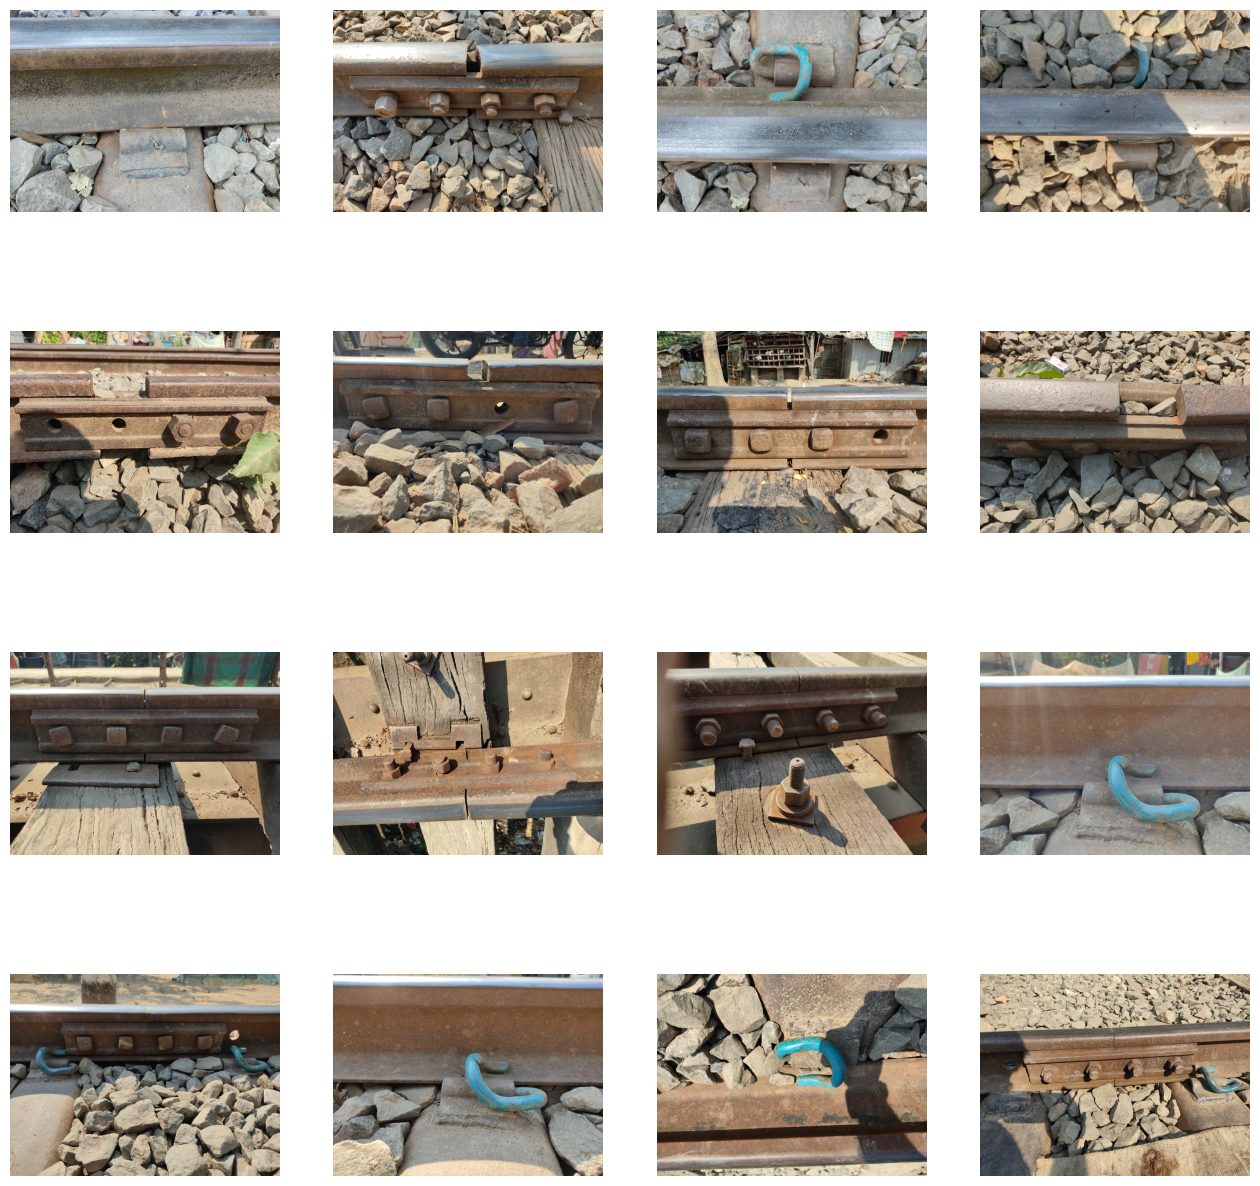

In [ ]:
# Assuming you have defined these variables earlier
train_Defective_dir = "/content/drive/MyDrive/Master Thesis/DDD/Prepared_Data/train/Defective"
train_Non_defective_dir = "/content/drive/MyDrive/Master Thesis/DDD/Prepared_Data/train/Non defective"
pic_index = 0
ncols = 4
nrows = 4

# Load file names
train_Defective_fnames = os.listdir(train_Defective_dir)
train_Non_defective_fnames = os.listdir(train_Non_defective_dir)

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8

next_Defective_pix = [os.path.join(train_Defective_dir, fname)
                for fname in train_Defective_fnames[pic_index-8:pic_index]]

next_Non_defective_pix = [os.path.join(train_Non_defective_dir, fname)
                for fname in train_Non_defective_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_Defective_pix + next_Non_defective_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3),activation='relu',input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy', 'mse'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 256 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(150, 150))
# --------------------
# Flow validation images in batches of 256using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=100,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


Found 482 images belonging to 2 classes.
Found 1936 images belonging to 2 classes.


In [ ]:
history = model.fit(
            train_generator,
            epochs=25,
            validation_data=validation_generator,
            verbose=2
            )

Epoch 1/25


InvalidArgumentError: ignored

Saving IMG_20201114_101124.jpg to IMG_20201114_101124 (1).jpg
1/1 [==============================] - 0s 34ms/step
Label:  [0.4810436]
IMG_20201114_101124 (1).jpg is a Non-Defective


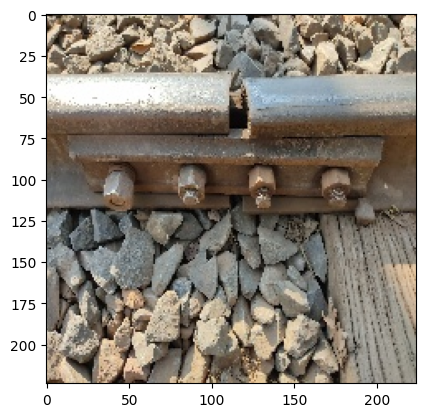

In [ ]:
## NOTE: If you are using Safari and this cell throws an error,
## please skip this block and run the next one instead.

import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded=files.upload()

for fn in uploaded.keys():

  # predicting images
  path='/content/' + fn
  img=load_img(path, target_size=(150, 150))

  x=img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print("Label: ",classes[0])

  if classes[0]>0.5:
    img = mpimg.imread(fn)
    plt.imshow(img)
    print(fn + " is Defective")
  else:
    img = mpimg.imread(fn)
    plt.imshow(img)
    print(fn + " is a Non-Defective")


1/1 [==============================] - 0s 159ms/step


<ipython-input-21-8da49c36d90c>:48: RuntimeWarning: invalid value encountered in divide
  x /= x.std ()


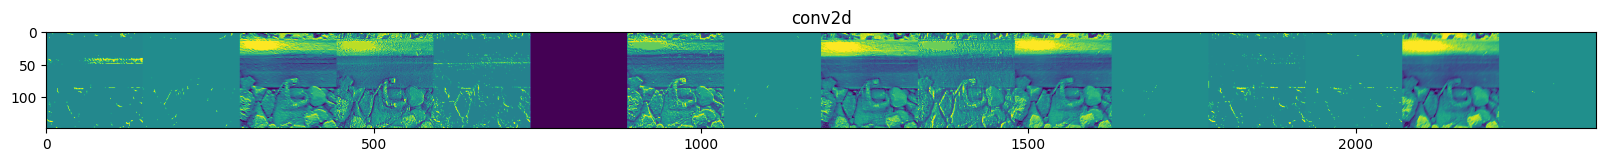

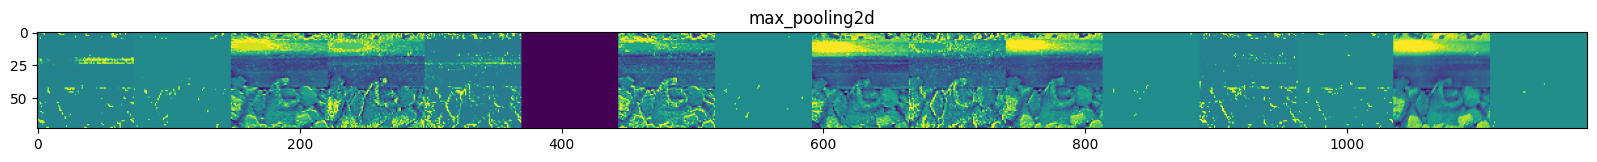

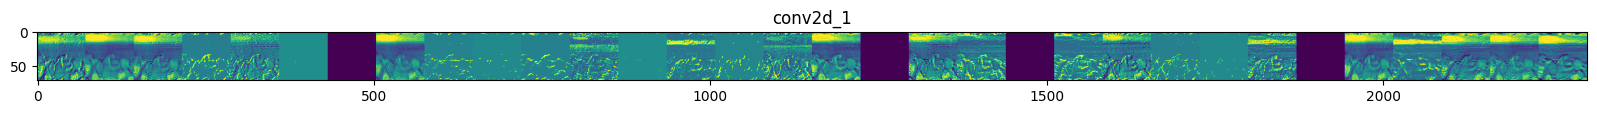

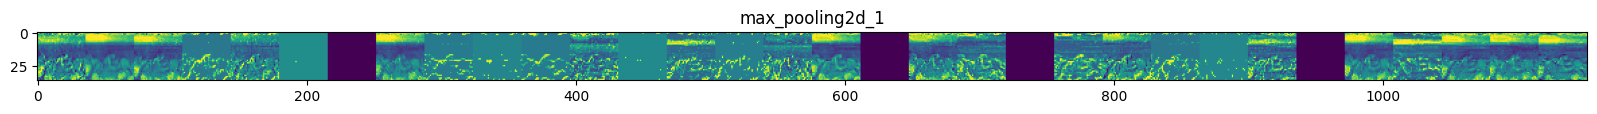

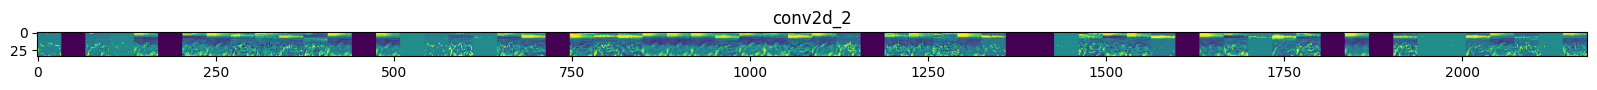

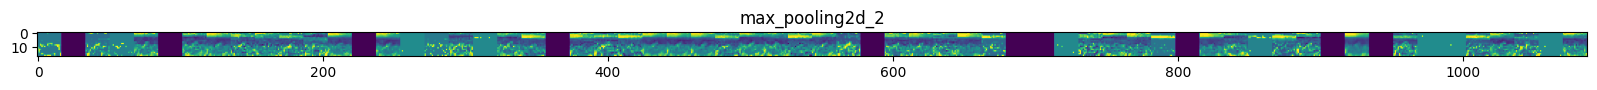

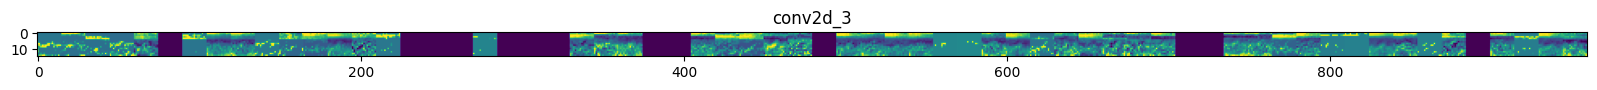

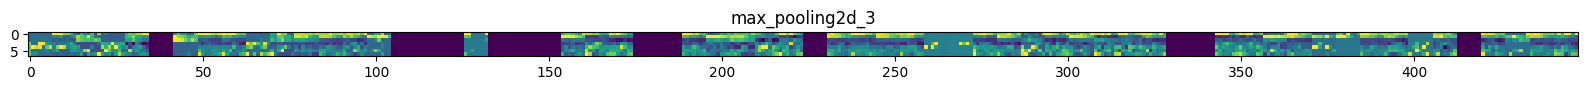

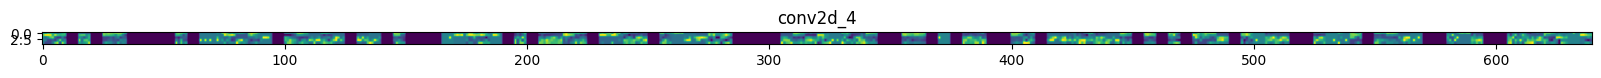

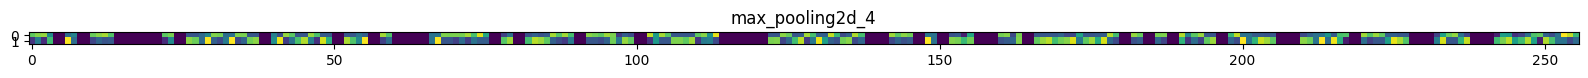

In [ ]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
Defective_img_files = [os.path.join(train_Defective_dir, f) for f in train_Defective_fnames]
Non_defective_img_files = [os.path.join(train_Non_defective_dir, f) for f in train_Non_defective_fnames]
img_path = random.choice(Defective_img_files + Non_defective_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):

  if len(feature_map.shape) == 4:

    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)

    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))

    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

Text(0.5, 1.0, 'Training and validation loss')

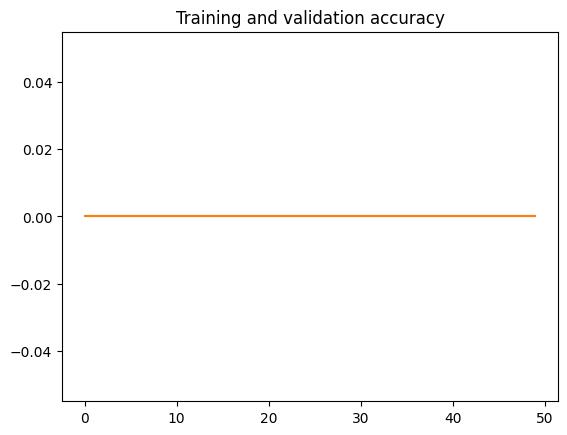

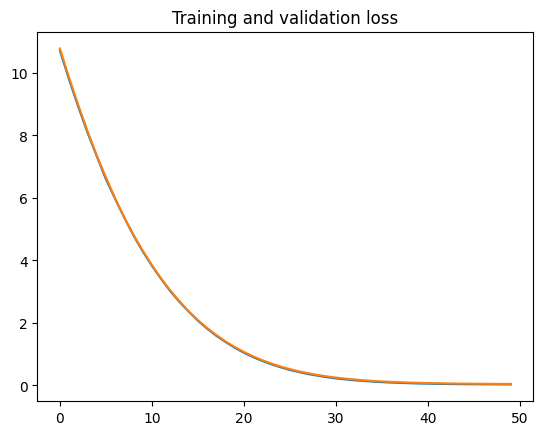

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )